In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import math

In [2]:
dataframe = pd.read_csv('preprocessedData.csv', index_col = 'ReadingDateTime', parse_dates = True)
dataframe

,BP,NO,NO2,NOX,SO2,SOLR,WDIR,WSPD
ReadingDateTime,,,,,,,,
2014-01-01 00:00:00,997.0,0.1,15.1,15.2,2.4,0.0,187.0,4.9
2014-01-01 00:15:00,997.0,0.1,15.1,15.2,2.4,0.0,187.0,4.9
2014-01-01 00:30:00,997.0,0.1,15.1,15.2,2.4,0.0,192.0,3.5
2014-01-01 00:45:00,997.0,0.1,15.1,15.2,2.4,0.0,209.0,3.5
2014-01-01 01:00:00,997.0,0.1,15.1,15.2,2.4,0.0,203.0,3.2
...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,1029.0,0.0,3.9,3.9,2.3,5.0,282.0,0.2
2018-12-31 23:00:00,1029.0,0.0,3.9,3.9,2.3,5.0,282.0,0.2
2018-12-31 23:15:00,1029.0,0.0,3.9,3.9,2.3,5.0,272.0,0.2


In [3]:
def shiftFiveReadings(dataframe, name):
    data = dataframe.copy()
    newColumn1 = name + "_Previous_1st_Reading"
    data[newColumn1] = dataframe[name].shift(+1)
      
    newColumn2 = name + "_Previous_2nd_Reading"
    data[newColumn2] = dataframe[name].shift(+2)
        
    newColumn3 = name + "_Previous_3rd_Reading"
    data[newColumn3] = dataframe[name].shift(+3)
        
    newColumn4 = name + "_Previous_4th_Reading"
    data[newColumn4] = dataframe[name].shift(+4)
       
    newColumn5 = name + "_Previous_5th_Reading"
    data[newColumn5] = dataframe[name].shift(+5)
    return data

In [4]:
#2.1 Distance Weighted KNN
print('NO - ')
dataframeB = shiftFiveReadings(dataframe, 'NO')
dataframeB.interpolate(method = 'linear', axis = 0, limit_direction = 'both', inplace = True)
features = dataframeB[dataframeB.columns.difference(['NO'])]
output = dataframeB['NO']
training_features, testing_features, training_output, testing_output = train_test_split(features, output, test_size = 0.30)

knnRegressor = neighbors.KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, metric = 'euclidean', weights = 'distance')
knnRegressor.fit(training_features, training_output)

start = time.time()
prediction_NO = knnRegressor.predict(testing_features)
end = time.time()
    
mse = mean_squared_error(testing_output, prediction_NO)
print("Mean Square Error = {}".format(mse))
r_square = r2_score(testing_output, prediction_NO)
print("R-Square = {}".format(r_square))
mae = mean_absolute_error(testing_output, prediction_NO)
print("Mean Absolute Error = {}".format(mae))
rmse = math.sqrt(mse)
print("Root Mean Square Error = {}".format(rmse))

NO - 
Mean Square Error = 0.7808745732374078
R-Square = 0.9219252670834404
Mean Absolute Error = 0.6010799018653303
Root Mean Square Error = 0.8836710775155017


In [5]:
NO = pd.read_csv("NO Metrics.csv")
NO.loc[len(NO.index)] = [2.1, 'Distance Weighted KNN', 'sqrt(sum(sq(u-v)))', '1/distance', 'no', start, end, rmse, mae, mse, r_square]
NO.to_csv("NO Metrics.csv", index = False)

In [6]:
df = pd.concat({'Actual' : testing_output,
               'Predicted' : pd.Series(prediction_NO, index = testing_features.index)}, 
              axis = 1)
df.to_csv("2.1(NO).csv")

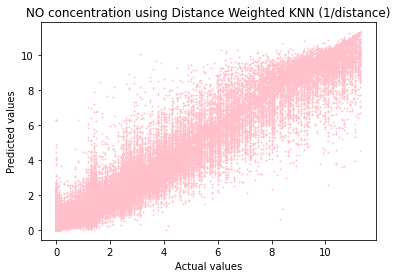

In [7]:
plt.scatter(testing_output, prediction_NO, s = 0.75, c = 'pink')
plt.xlabel('Actual values')
plt.ylabel("Predicted values")
plt.title('NO concentration using Distance Weighted KNN (1/distance)')
plt.show()

In [8]:
print('NO2 - ')
dataframeB = shiftFiveReadings(dataframe, 'NO2')
dataframeB.interpolate(method = 'linear', axis = 0, limit_direction = 'both', inplace = True)
features = dataframeB[dataframeB.columns.difference(['NO2'])]
output = dataframeB['NO2']
training_features, testing_features, training_output, testing_output = train_test_split(features, output, test_size = 0.30)

knnRegressor = neighbors.KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, metric = 'euclidean', weights = 'distance')
knnRegressor.fit(training_features, training_output)

start = time.time()
prediction_NO2 = knnRegressor.predict(testing_features)
end = time.time()
    
mse = mean_squared_error(testing_output, prediction_NO2)
print("Mean Square Error = {}".format(mse))
r_square = r2_score(testing_output, prediction_NO2)
print("R-Square = {}".format(r_square))
mae = mean_absolute_error(testing_output, prediction_NO2)
print("Mean Absolute Error = {}".format(mae))
rmse = math.sqrt(mse)
print("Root Mean Square Error = {}".format(rmse))

NO2 - 
Mean Square Error = 6.451231680709988
R-Square = 0.9668631445361018
Mean Absolute Error = 1.7059569371372996
Root Mean Square Error = 2.5399274951679205


In [9]:
NO2 = pd.read_csv("NO2 Metrics.csv")
NO2.loc[len(NO2.index)] = [2.1, 'Distance Weighted KNN', 'sqrt(sum(sq(u-v)))', '1/distance', 'no', start, end, rmse, mae, mse, r_square]
NO2.to_csv("NO2 Metrics.csv", index = False)

In [10]:
df = pd.concat({'Actual' : testing_output,
               'Predicted' : pd.Series(prediction_NO2, index = testing_features.index)}, 
              axis = 1)
df.to_csv("2.1(NO2).csv")

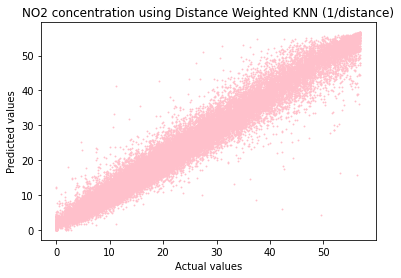

In [11]:
plt.scatter(testing_output, prediction_NO2, s = 0.75, c = 'pink')
plt.xlabel('Actual values')
plt.ylabel("Predicted values")
plt.title('NO2 concentration using Distance Weighted KNN (1/distance)')
plt.show()

In [12]:
#2.1 Distance Weighted KNN
print('NOX - ')
dataframeB = shiftFiveReadings(dataframe, 'NOX')
dataframeB.interpolate(method = 'linear', axis = 0, limit_direction = 'both', inplace = True)
features = dataframeB[dataframeB.columns.difference(['NOX'])]
output = dataframeB['NOX']
training_features, testing_features, training_output, testing_output = train_test_split(features, output, test_size = 0.30)

knnRegressor = neighbors.KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, metric = 'euclidean', weights = 'distance')
knnRegressor.fit(training_features, training_output)

start = time.time()
prediction_NOX = knnRegressor.predict(testing_features)
end = time.time()
    
mse = mean_squared_error(testing_output, prediction_NOX)
print("Mean Square Error = {}".format(mse))
r_square = r2_score(testing_output, prediction_NOX)
print("R-Square = {}".format(r_square))
mae = mean_absolute_error(testing_output, prediction_NOX)
print("Mean Absolute Error = {}".format(mae))
rmse = math.sqrt(mse)
print("Root Mean Square Error = {}".format(rmse))

NOX - 
Mean Square Error = 9.866200559069913
R-Square = 0.969961863523778
Mean Absolute Error = 1.9800057231807937
Root Mean Square Error = 3.1410508685899874


In [13]:
NOX = pd.read_csv("NOX Metrics.csv")
NOX.loc[len(NOX.index)] = [2.1, 'Distance Weighted KNN', 'sqrt(sum(sq(u-v)))', '1/distance', 'no', start, end, rmse, mae, mse, r_square]
NOX.to_csv("NOX Metrics.csv", index = False)

In [14]:
df = pd.concat({'Actual' : testing_output,
               'Predicted' : pd.Series(prediction_NOX, index = testing_features.index)}, 
              axis = 1)
df.to_csv("2.1(NOX).csv")

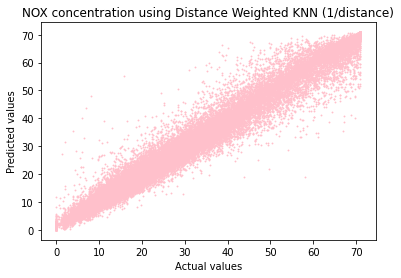

In [15]:
plt.scatter(testing_output, prediction_NOX, s = 0.75, c = 'pink')
plt.xlabel('Actual values')
plt.ylabel("Predicted values")
plt.title('NOX concentration using Distance Weighted KNN (1/distance)')
plt.show()